#Sentiment Analysis

### Dependencies

In [1]:
import nltk
from nltk import sentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer





nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

## Sentiment Analysis object

In [0]:
sid = nltk.sentiment.vader.SentimentIntensityAnalyzer()



##Interacting with the sentiment analysis object

In [0]:




def basic_sentiment_analysis(reviews):
  
  text_value_dicts = []
  
  total_score = 0
 
  i = 1
  
  for review in reviews:
    sentiment_values = sid.polarity_scores(review)

    
    total_score += abs(sentiment_values['compound'])
    
    txt_val_dict = {'id': i, 'score': sentiment_values['compound'], 'review': review, 'stars': 0}
    
    text_value_dicts.append(txt_val_dict)
    i+=1

  weighted_average = total_score/len(reviews)
  
  #for dict in text_value_dicts:
    
    
    #if score >= 0:
      #weighted_score = 
    
   
  return text_value_dicts

In [0]:
review_list = [
    
    
 'Warren Beatty has never been so entertaining.',
 'Unbelievably bad acting!!',
 "I like to hate Michael Bay films, but I couldn't fault this one",
 'The wait staff was HORRIBLE',
 'I thoroughly enjoyed my meal',
 'I feel ripped off and cheated',
 'My family and I had a wonderful time at the restaurant.',
 'I like to hate Michael Bay films, and this time is no different.',
 'The Chicken sandwich with cheese and lettuce. I also get it with their fries, which are waffle fries!!!',
 "I've never had a complaint here, get the usual which is a #2 Spicy Chicken sandwich with sweet tea and I'm happy!",
 "The Polynesian sauce is a little meh, but the Chick-fil-A honey mustard is pretty FTW.",
 'The food is so delicious and tasty overall and the milkshakes are one of the absolute best I ever had!',
 "I also like the decor of the restaurant, I felt like I was at a restaurant and not a fast food joint.",
 "This location was a disappointment. Literally a mess, if you like stale fries, and cold chicken then pull up. Otherwise go to another location.",
 "Drive through line was 40 minutes long. Food was cold and the people working were clueless and rushing the service. Probably the worst I've ever been spoken to at a chick-fil-A. And how do you even run out of large fries?",
"My review highlights this location only: PLUS - The Original Chicken Sandwich was perfect. Staff provided smooth service and were courteous from start to finish. MINUS - The fries were soggy - limp and just sad. The place was packed, and while the cashiers did a great job of moving the line through quickly, our to-go order got passed up, and we had to ask where our order was after seeing several other orders move through. I don't know if it had to be re-made or was just overlooked on the counter, but it wasn't fun having to deal with. ",
"Wow, just wow! Was expecting my chicken sandwich and I got tiny pieces of meat. I hate Chick-fill-a today or whoever served me up. The person even repeated my order, and gave me the wrong item. So piss",
"Not greasy like Pizza hut, not flavorless like round table,this was a budget pizza with bold flavors",
"“The GM walls around and checks in on the diners, Ilya is amazing, truly a one of a kind dining experience.” ",
"The rest of the food was ok. Pastas were dry and lacked flavor. The side veggies were over cooked. ",
"Had the worst experience!! I made reservations for our anniversary a week ago, and was very excited to try this romantic restaurant for the first time. My reservation was for Tuesday at 9:30 pm. On Tuesday at 7 pm, I get a call from the restaurant saying my reservation is cancelled due to unexpected maintenance in the restaurant!!! ARE YOU KIDDING ME???? YOU CANCEL ON ME TWO HOURS BEFORE MY RESERVATION????? How unprofessional!!!!!",
]

## Example call of the function

In [0]:
example_call = basic_sentiment_analysis(review_list)

for review in example_call:
  print(review['id'], '. ' , review['review'], '\n', 'Score: ', review['score'], '\n\n')

1 .  Warren Beatty has never been so entertaining. 
 Score:  0.5777 


2 .  Unbelievably bad acting!! 
 Score:  -0.6572 


3 .  I like to hate Michael Bay films, but I couldn't fault this one 
 Score:  0.3153 


4 .  The wait staff was HORRIBLE 
 Score:  -0.6408 


5 .  I thoroughly enjoyed my meal 
 Score:  0.5563 


6 .  I feel ripped off and cheated 
 Score:  -0.5106 


7 .  My family and I had a wonderful time at the restaurant. 
 Score:  0.5719 


8 .  I like to hate Michael Bay films, and this time is no different. 
 Score:  -0.5267 


9 .  The Chicken sandwich with cheese and lettuce. I also get it with their fries, which are waffle fries!!! 
 Score:  0.0 


10 .  I've never had a complaint here, get the usual which is a #2 Spicy Chicken sandwich with sweet tea and I'm happy! 
 Score:  0.8351 


11 .  The Polynesian sauce is a little meh, but the Chick-fil-A honey mustard is pretty FTW. 
 Score:  0.8859 


12 .  The food is so delicious and tasty overall and the milkshakes are o

##Mood Clouds

In [0]:
!pip install wordcloud

In [0]:
!wget https://upload.wikimedia.org/wikipedia/commons/6/61/Black_Circle.jpg


--2019-03-11 03:13:35--  https://upload.wikimedia.org/wikipedia/commons/6/61/Black_Circle.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14749 (14K) [image/jpeg]
Saving to: ‘Black_Circle.jpg.1’

Black_Circle.jpg.1  100%[===================>]  14.40K  --.-KB/s    in 0.002s  

2019-03-11 03:13:35 (6.88 MB/s) - ‘Black_Circle.jpg.1’ saved [14749/14749]



In [0]:
import PIL
from PIL import Image, ImageDraw, ImageFont
from IPython import display
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from os import path



In [0]:
stopwords = set(STOPWORDS)

In [0]:





def review_tokenize(review_list):
  filtered_text = ''
  
  for review in review_list:
    sentences = nltk.sent_tokenize(review)
    for sentence in sentences:
      tokens = nltk.pos_tag(nltk.word_tokenize(sentence))

      for i in tokens:
        if i[1] == "JJ":
          filtered_text += i[0] + " "
  return filtered_text


In [0]:
tokenized_reviews = review_tokenize(review_list)

In [0]:
def green_red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl({}, 100%, 50%)".format(int(70.0 * sid.polarity_scores(word)["compound"] + 45.0))

In [0]:
def create_wordcloud(text, name):
  mask = np.array(PIL.Image.open("Black_Circle.jpg").resize((540,540)))
  wc = WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA", max_words=1000, mask=mask, stopwords=stopwords, margin=5,
               random_state=1).generate(text)
  wc.recolor(color_func=green_red_color_func)
  wc.to_file( name + ".png")
  display.display(display.Image(filename=(name + ".png")))

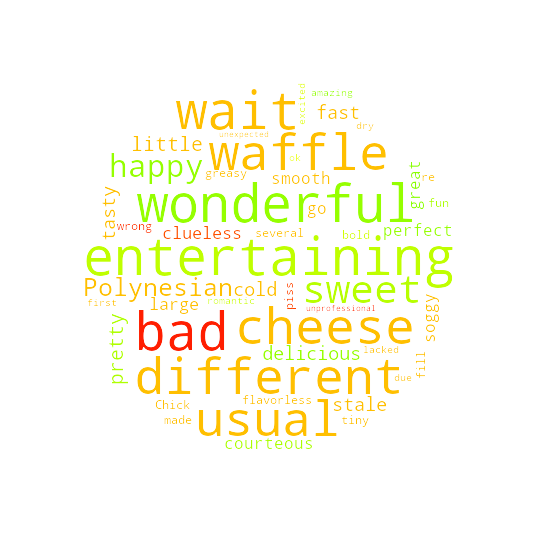

In [0]:
create_wordcloud(tokenized_reviews, 'example')